In [1]:
#working on the labour data-set;
rdd = sc.textFile("/user/centos/SLID.csv")

In [2]:
rdd.count()

7426

In [3]:
rdd.take(2)

[u'"","wages","education","age","sex","language"',
 u'"1",10.56,15,40,"Male","English"']

In [7]:
header=rdd.first()

In [8]:
len(header.split(","))

6

In [ ]:
#first cleanse the data? before converting it into dataframe?
#also create schema?

In [12]:
df = spark.read.csv("/user/centos/SLID.csv",header=True)

In [14]:
df.show()

+---+-----+---------+---+------+--------+
|_c0|wages|education|age|   sex|language|
+---+-----+---------+---+------+--------+
|  1|10.56|       15| 40|  Male| English|
|  2|   11|     13.2| 19|  Male| English|
|  3|   NA|       16| 49|  Male|   Other|
|  4|17.76|       14| 46|  Male|   Other|
|  5|   NA|        8| 71|  Male| English|
|  6|   14|       16| 50|Female| English|
|  7|   NA|       12| 70|Female| English|
|  8|   NA|     14.5| 42|Female| English|
|  9|  8.2|       15| 31|  Male| English|
| 10|   NA|       10| 56|Female| English|
| 11|   NA|     12.5| 71|Female| English|
| 12|16.97|     13.5| 30|Female| English|
| 13|   NA|        2| 56|  Male| English|
| 14|  6.7|       12| 61|Female| English|
| 15|   NA|       12| 25|Female| English|
| 16|   NA|       11| 36|Female|  French|
| 17|   NA|       11| 54|Female| English|
| 18|   NA|       10| 62|Female| English|
| 19|   NA|     10.5| 70|Female| English|
| 20|   14|       14| 46|Female|   Other|
+---+-----+---------+---+------+--

In [15]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- wages: string (nullable = true)
 |-- education: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- language: string (nullable = true)



In [16]:
#everthing as string. how about specifying schema first?
import pyspark.sql.types as typ

string_cols = ["sex","language"]
numerical_cols = ["wages","education","age"]

struct_fields= [typ.StructField(col,typ.StringType(),True) for col in string_cols]\
+[typ.StructField(col,typ.IntegerType(),True) for col in numerical_cols]

In [21]:
struct_fields

[StructField(sex,StringType,true),
 StructField(language,StringType,true),
 StructField(wages,IntegerType,true),
 StructField(education,IntegerType,true),
 StructField(age,IntegerType,true)]

In [22]:
df_schema = typ.StructType(struct_fields)

In [44]:
#can do with a dictionary as well. anyways skipping it;
df = spark.read.csv("/user/centos/SLID.csv",header=True,schema=df_schema)

In [24]:
df.printSchema()

root
 |-- sex: string (nullable = true)
 |-- language: string (nullable = true)
 |-- wages: integer (nullable = true)
 |-- education: integer (nullable = true)
 |-- age: integer (nullable = true)



In [45]:
df.show() #giving all nulls?

+----+--------+-----+---------+----+
| sex|language|wages|education| age|
+----+--------+-----+---------+----+
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
+----+--------+-----+---------+----+
only showing top 20 rows



In [28]:
#finding if there are any missing values?
df.count()

7425

In [29]:
import pyspark.sql.functions as funct

In [32]:
df.agg(funct.count("wages")).rdd.flatMap(lambda row:row).collect()

[5540]

In [ ]:
dict([(col)])

In [33]:
d1=dict()

In [34]:
d1["irfan"]=10

In [35]:
d1

{'irfan': 10}

In [38]:
num_rows=df.count()

In [40]:
missing_val_dict=dict()
for col in df.columns:
    num_missing=df.agg(funct.count(col)).rdd.flatMap(lambda row:row).collect()
    missing_val_dict[col]=num_rows-num_missing[0]
    

In [41]:
missing_val_dict

{'age': 7425, 'education': 0, 'language': 0, 'sex': 0, 'wages': 1885}

In [42]:
num_rows

7425

In [43]:
df.show()

+----+--------+-----+---------+----+
| sex|language|wages|education| age|
+----+--------+-----+---------+----+
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
|null|    null| null|     null|null|
+----+--------+-----+---------+----+
only showing top 20 rows



In [47]:
len(rdd.first().split(",")) #number of elements in the data are 6 whereas
#you defined schema for just 5 columns?


6

In [50]:
rdd.map(lambda row:row.split(",")).map(lambda row:row[1]).take(10)

[u'"wages"',
 u'10.56',
 u'11',
 u'NA',
 u'17.76',
 u'NA',
 u'14',
 u'NA',
 u'NA',
 u'8.2']

In [51]:
#its because name of the first column is empty;
#redefine your schema
#string_cols = ["sex","language"]
#numerical_cols = ["wages","education","age"]

#also, you didn't take care of the order of columns babes;
col_dict=dict([("id",typ.IntegerType()),
              ("wages",typ.IntegerType()),
              ("education",typ.IntegerType()),
              ("age",typ.IntegerType()),
              ("sex",typ.StringType()),
              ("language",typ.StringType())])

In [52]:
col_dict #why doesn't it maintain order?

{'age': IntegerType,
 'education': IntegerType,
 'id': IntegerType,
 'language': StringType,
 'sex': StringType,
 'wages': IntegerType}

In [53]:
[x for x in col_dict]

['language', 'age', 'sex', 'wages', 'education', 'id']

In [2]:
#resuming from here. need to create proper schema of it. previously used
#dict but it wasn't ordered. so be careful

In [3]:
import collections

In [10]:
import pyspark.sql.types as typ
col_dict = collections.OrderedDict([("id",typ.IntegerType()),
              ("wages",typ.IntegerType()),
              ("education",typ.IntegerType()),
              ("age",typ.IntegerType()),
              ("sex",typ.StringType()),
              ("language",typ.StringType())])

In [11]:
col_dict

OrderedDict([('id', IntegerType),
             ('wages', IntegerType),
             ('education', IntegerType),
             ('age', IntegerType),
             ('sex', StringType),
             ('language', StringType)])

In [18]:
col_dict.items

<bound method OrderedDict.items of OrderedDict([('id', IntegerType), ('wages', IntegerType), ('education', IntegerType), ('age', IntegerType), ('sex', StringType), ('language', StringType)])>

In [17]:
[(x,col_dict[x]) for x in col_dict]

[('id', IntegerType),
 ('wages', IntegerType),
 ('education', IntegerType),
 ('age', IntegerType),
 ('sex', StringType),
 ('language', StringType)]

In [19]:
col_dict["id"]

IntegerType

In [20]:
struct_fields = [typ.StructField(x,col_dict[x],True) for x in col_dict]

In [21]:
struct_fields

[StructField(id,IntegerType,true),
 StructField(wages,IntegerType,true),
 StructField(education,IntegerType,true),
 StructField(age,IntegerType,true),
 StructField(sex,StringType,true),
 StructField(language,StringType,true)]

In [22]:
df_schema = typ.StructType(struct_fields)

In [23]:
df=spark.read.csv("/user/centos/SLID.csv",header=True,schema=df_schema)

In [24]:
df.show()

+----+-----+---------+----+------+--------+
|  id|wages|education| age|   sex|language|
+----+-----+---------+----+------+--------+
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|   6|   14|       16|  50|Female| English|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|null| null|     null|null|  null|    null|
|  20|   14|       14|  46|Femal

In [27]:
df.persist().count()

7425

In [26]:
import pyspark.sql.functions as funct
df.agg(funct.count("id")).show()

+---------+
|count(id)|
+---------+
|     7425|
+---------+



In [29]:
id_array = df.select("id").rdd.flatMap(lambda row:row).collect()

In [31]:
sum([x==None for x in id_array])

6874

In [33]:
id_rdd_array = rdd.map(lambda row:row.split(",")).map(lambda row:row[0]).collect()

In [34]:
sum([x==None for x in id_rdd_array])

0

In [35]:
id_rdd_array

[u'""',
 u'"1"',
 u'"2"',
 u'"3"',
 u'"4"',
 u'"5"',
 u'"6"',
 u'"7"',
 u'"8"',
 u'"9"',
 u'"10"',
 u'"11"',
 u'"12"',
 u'"13"',
 u'"14"',
 u'"15"',
 u'"16"',
 u'"17"',
 u'"18"',
 u'"19"',
 u'"20"',
 u'"21"',
 u'"22"',
 u'"23"',
 u'"24"',
 u'"25"',
 u'"26"',
 u'"27"',
 u'"28"',
 u'"29"',
 u'"30"',
 u'"31"',
 u'"32"',
 u'"33"',
 u'"34"',
 u'"35"',
 u'"36"',
 u'"37"',
 u'"38"',
 u'"39"',
 u'"40"',
 u'"41"',
 u'"42"',
 u'"43"',
 u'"44"',
 u'"45"',
 u'"46"',
 u'"47"',
 u'"48"',
 u'"49"',
 u'"50"',
 u'"51"',
 u'"52"',
 u'"53"',
 u'"54"',
 u'"55"',
 u'"56"',
 u'"57"',
 u'"58"',
 u'"59"',
 u'"60"',
 u'"61"',
 u'"62"',
 u'"63"',
 u'"64"',
 u'"65"',
 u'"66"',
 u'"67"',
 u'"68"',
 u'"69"',
 u'"70"',
 u'"71"',
 u'"72"',
 u'"73"',
 u'"74"',
 u'"75"',
 u'"76"',
 u'"77"',
 u'"78"',
 u'"79"',
 u'"80"',
 u'"81"',
 u'"82"',
 u'"83"',
 u'"84"',
 u'"85"',
 u'"86"',
 u'"87"',
 u'"88"',
 u'"89"',
 u'"90"',
 u'"91"',
 u'"92"',
 u'"93"',
 u'"94"',
 u'"95"',
 u'"96"',
 u'"97"',
 u'"98"',
 u'"99"',
 u'"100"',


In [36]:
#when creating dataframe using spark.read.csv, getting weird result i.e. 
#many of the columns are appearing as null. i think its because of "" in the
#data? how about you create each as string and then cast?

In [39]:
header = rdd.first()

In [40]:
header #it has empty value at the start. so make it something good?

u'"","wages","education","age","sex","language"'

In [42]:
header_list=header.split(",")

In [43]:
header_list[0]="id"

In [46]:
header_list = [str(x) for x in header_list]

In [48]:
header_list = [x[1:-1] for x in header_list if x != "id"]

In [51]:
header_list=['id']+header_list

In [52]:
header_list #cleaning the headers properly;

['id', 'wages', 'education', 'age', 'sex', 'language']

In [ ]:
#so the data has "" in each string value. needs to be handled properly;
#for id columns, it has them. if other columns are int, it doesn't 
#have them;

In [53]:
#use RDD level processing to clean the data? or use UDF? i think lets
#use UDF;
struct_fields_string = [typ.StructField(x,typ.StringType(),True) for x in header_list]

In [54]:
df_schema_string=typ.StructType(struct_fields_string)

In [58]:
header

u'"","wages","education","age","sex","language"'

In [59]:
rdd_2=rdd.filter(lambda x: x != header).map(lambda x:x.split(","))

In [113]:
df_string=spark.createDataFrame(rdd_2,df_schema_string)

In [114]:
df_string.show()

+----+-----+---------+---+--------+---------+
|  id|wages|education|age|     sex| language|
+----+-----+---------+---+--------+---------+
| "1"|10.56|       15| 40|  "Male"|"English"|
| "2"|   11|     13.2| 19|  "Male"|"English"|
| "3"|   NA|       16| 49|  "Male"|  "Other"|
| "4"|17.76|       14| 46|  "Male"|  "Other"|
| "5"|   NA|        8| 71|  "Male"|"English"|
| "6"|   14|       16| 50|"Female"|"English"|
| "7"|   NA|       12| 70|"Female"|"English"|
| "8"|   NA|     14.5| 42|"Female"|"English"|
| "9"|  8.2|       15| 31|  "Male"|"English"|
|"10"|   NA|       10| 56|"Female"|"English"|
|"11"|   NA|     12.5| 71|"Female"|"English"|
|"12"|16.97|     13.5| 30|"Female"|"English"|
|"13"|   NA|        2| 56|  "Male"|"English"|
|"14"|  6.7|       12| 61|"Female"|"English"|
|"15"|   NA|       12| 25|"Female"|"English"|
|"16"|   NA|       11| 36|"Female"| "French"|
|"17"|   NA|       11| 54|"Female"|"English"|
|"18"|   NA|       10| 62|"Female"|"English"|
|"19"|   NA|     10.5| 70|"Female"

In [62]:
#now stripping off the "" in the values;
col_with_quotes = [x for x in df_string.columns if x not in ["wages","education","age"]]

In [63]:
col_with_quotes

['id', 'sex', 'language']

In [64]:
#creating udf. firstly defining my function:
def strip_quotes(given_value):
    return given_value[1:-1]

In [65]:
from pyspark.sql.functions import udf

In [66]:
strip_quotes_udf = udf(strip_quotes)

In [115]:
final_df=df_string.withColumn("id",strip_quotes_udf("id")).withColumn("sex",strip_quotes_udf("sex")).\
withColumn("language",strip_quotes_udf("language"))

In [116]:
final_df.persist().show()
#now with the final df created finally; lets proceed to the  analysis part;
#no. all the columns are still string.

+---+-----+---------+---+------+--------+
| id|wages|education|age|   sex|language|
+---+-----+---------+---+------+--------+
|  1|10.56|       15| 40|  Male| English|
|  2|   11|     13.2| 19|  Male| English|
|  3|   NA|       16| 49|  Male|   Other|
|  4|17.76|       14| 46|  Male|   Other|
|  5|   NA|        8| 71|  Male| English|
|  6|   14|       16| 50|Female| English|
|  7|   NA|       12| 70|Female| English|
|  8|   NA|     14.5| 42|Female| English|
|  9|  8.2|       15| 31|  Male| English|
| 10|   NA|       10| 56|Female| English|
| 11|   NA|     12.5| 71|Female| English|
| 12|16.97|     13.5| 30|Female| English|
| 13|   NA|        2| 56|  Male| English|
| 14|  6.7|       12| 61|Female| English|
| 15|   NA|       12| 25|Female| English|
| 16|   NA|       11| 36|Female|  French|
| 17|   NA|       11| 54|Female| English|
| 18|   NA|       10| 62|Female| English|
| 19|   NA|     10.5| 70|Female| English|
| 20|   14|       14| 46|Female|   Other|
+---+-----+---------+---+------+--

In [96]:
new_schema = typ.StructType([
    typ.StructField(("id"),typ.IntegerType(),True),
    typ.StructField(("wages"),typ.IntegerType(),True),
    typ.StructField(("education"),typ.IntegerType(),True),
    typ.StructField(("age"),typ.IntegerType(),True),
    typ.StructField(("sex"),typ.StringType(),True),
    typ.StructField(("language"),typ.StringType(),True),
    
])

In [97]:
final_df2=spark.createDataFrame(final_df.rdd,new_schema)

In [98]:
final_df2.printSchema()

root
 |-- id: integer (nullable = true)
 |-- wages: integer (nullable = true)
 |-- education: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- language: string (nullable = true)



In [99]:
final_df2.show() #giving error. try casting then??

Py4JJavaError: An error occurred while calling o333.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 33.0 failed 4 times, most recent failure: Lost task 0.3 in stage 33.0 (TID 47, gen1cdhworker1.idolabs.com, executor 1): ExecutorLostFailure (executor 1 exited caused by one of the running tasks) Reason: Container marked as failed: container_1517713109779_0175_01_000002 on host: gen1cdhworker1.idolabs.com. Exit status: 50. Diagnostics: Exception from container-launch.
Container id: container_1517713109779_0175_01_000002
Exit code: 50
Stack trace: ExitCodeException exitCode=50: 
	at org.apache.hadoop.util.Shell.runCommand(Shell.java:604)
	at org.apache.hadoop.util.Shell.run(Shell.java:507)
	at org.apache.hadoop.util.Shell$ShellCommandExecutor.execute(Shell.java:789)
	at org.apache.hadoop.yarn.server.nodemanager.DefaultContainerExecutor.launchContainer(DefaultContainerExecutor.java:213)
	at org.apache.hadoop.yarn.server.nodemanager.containermanager.launcher.ContainerLaunch.call(ContainerLaunch.java:302)
	at org.apache.hadoop.yarn.server.nodemanager.containermanager.launcher.ContainerLaunch.call(ContainerLaunch.java:82)
	at java.util.concurrent.FutureTask.run(FutureTask.java:266)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)


Container exited with a non-zero exit code 50

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1599)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1587)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1586)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1586)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1820)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1769)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1758)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2027)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2048)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2067)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:363)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collectFromPlan(Dataset.scala:3272)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2484)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2484)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3253)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:77)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3252)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2484)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2698)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:254)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:748)


In [104]:
final_df.printSchema()

root
 |-- id: string (nullable = true)
 |-- wages: string (nullable = true)
 |-- education: string (nullable = true)
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- language: string (nullable = true)



In [103]:
import collections

In [105]:
col_dict=collections.OrderedDict([
    ("id","integer"),
    ("wages","integer"),
    ("education","integer"),
    ("age","integer"),
    ("sex","string"),
    ("language","string")
])

In [108]:
[final_df[col].cast(col_dict[col]) for col in col_dict]
#[(col,col_dict[col]) for col in col_dict]

[Column<CAST(id AS INT)>,
 Column<CAST(wages AS INT)>,
 Column<CAST(education AS INT)>,
 Column<CAST(age AS INT)>,
 Column<CAST(sex AS STRING)>,
 Column<CAST(language AS STRING)>]

In [117]:
final_df3=final_df.select([final_df[col].cast(col_dict[col]) for col in col_dict])

In [118]:
final_df3.printSchema()

root
 |-- id: integer (nullable = true)
 |-- wages: integer (nullable = true)
 |-- education: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- language: string (nullable = true)



In [119]:
%matplotlib inline
import matplotlib.pyplot as plt

In [75]:
#visualize the wages variable against the features?
#wages w.r.t education; scatter plot;
#need two lists; do sampling;


In [86]:
final_df.sample(True,0.2,40).count()

1560

In [122]:
#wages_sample=final_df3.select("wages").sample(False,0.2,50).rdd.flatMap(lambda row:row).collect()

In [123]:
wages_sample

[None,
 8,
 16,
 None,
 36,
 None,
 None,
 16,
 20,
 None,
 15,
 14,
 None,
 None,
 6,
 6,
 None,
 8,
 None,
 14,
 23,
 10,
 None,
 None,
 None,
 None,
 None,
 8,
 20,
 11,
 None,
 7,
 10,
 11,
 None,
 None,
 None,
 13,
 13,
 None,
 21,
 13,
 3,
 12,
 10,
 5,
 13,
 41,
 14,
 None,
 None,
 6,
 23,
 5,
 None,
 None,
 None,
 None,
 None,
 7,
 None,
 None,
 17,
 None,
 None,
 None,
 None,
 12,
 7,
 9,
 None,
 8,
 20,
 None,
 7,
 None,
 16,
 None,
 None,
 9,
 10,
 None,
 None,
 None,
 25,
 21,
 15,
 29,
 15,
 None,
 29,
 9,
 11,
 32,
 6,
 None,
 13,
 None,
 6,
 13,
 None,
 14,
 8,
 None,
 None,
 None,
 24,
 16,
 None,
 None,
 9,
 7,
 8,
 None,
 None,
 None,
 27,
 None,
 11,
 10,
 None,
 11,
 7,
 13,
 7,
 9,
 17,
 6,
 None,
 11,
 None,
 None,
 3,
 None,
 14,
 8,
 None,
 28,
 24,
 None,
 None,
 None,
 None,
 None,
 17,
 9,
 17,
 7,
 None,
 None,
 3,
 12,
 None,
 6,
 7,
 None,
 24,
 None,
 None,
 None,
 14,
 None,
 6,
 8,
 27,
 30,
 14,
 14,
 19,
 5,
 None,
 16,
 31,
 12,
 7,
 15,
 None,
 None

In [129]:
#try plotting the column with None values in them;
#education_sample=final_df3.select("education").sample(False,0.2,50)....
#i think you should do it together.
wages_education_sample = final_df3.select(["wages","language"]).sample(False,0.2,40).rdd.flatMap(lambda row:row).collect()
#this approach isn't correct because you will get col1,col2 col1,col2 repeatedly.
#its better to convert into tuple.

In [142]:
we_sample=final_df3.select(["wages","education"]).sample(False,0.2,100)\
.rdd.map(lambda row: (row[0],row[1])).collect()

In [144]:
#we_sample
w_sample=[w[0] for w in we_sample]

In [147]:
e_sample=[w[1] for w in we_sample]

In [148]:
#we_sample

In [149]:
#w_sample

In [150]:
#wages_education_sample

In [152]:
plt.scatter(e_sample,w_sample)

In [154]:
#now try doing for wages and age:
wa_sample=final_df3.select(["wages","age"]).sample(True,0.2,100).rdd\
.map(lambda row:(row[0],row[1])).collect()

In [155]:
w_sample=[w[0] for w in wa_sample]
a_sample=[a[1] for a in wa_sample]

In [156]:
plt.scatter(a_sample,w_sample)

In [160]:
#for boxplot;
w_eng_sample=final_df3.filter("language == 'English'").select(["wages"]).sample(False,0.2,100)\
.rdd.flatMap(lambda row:row).collect()

In [161]:
w_french_sample = final_df3.filter("language == 'French'")\
.select(["wages"]).rdd.flatMap(lambda row:row).collect()

In [165]:
import numpy as np
np_w_eng_sample=np.array(w_eng_sample)

In [167]:
#plt.box(np_w_eng_sample)#? not showing; 

In [168]:
#having issues in boxplot;
x=[range(1,10)]

In [178]:
#clean the lists?
w_eng_sample_clean=[x for x in w_eng_sample if x != None]
w_french_sample_clean=[x for x in w_french_sample if x!= None]

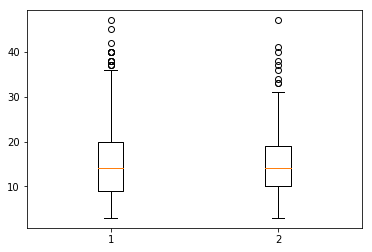

In [179]:
plt.boxplot([w_eng_sample_clean,w_french_sample_clean])
plt.show()

In [ ]:
#meaning that there are a lot of outliers?
#try standardizer/scalers? and then train regression model;